# Lower threshold? Gloomy financial future?
## An illustration of operator positions in four first tier cities in China.

- Group Member: He Weiyuan, Chen Dantong, Cai Yanhuan, Zhang Chuhan

Xiao Zhang, a current student in communication and new media program, was looking for a job as an operator. Being rejected by five companies, she was a little bit disappointed. “I don’t what I should do to get an offer.”She told us, “The operator position decrease in these two years, students like me are anxious” In fact, Xiao Zhang was not the only one student that face this circumstance. Xiao He, who resigned her job to study in a master program, found it much more difficult to find a job that she resigned before. Operator, the first choice of many liberal art graduates who want to get into the Internet industry, is quite hot now. Why so many students choose it? And what kind of the staff the company really want?

Frustrated but not losing faith, Xiao Zhang and Xiao He decided to conduct a study to further understand current situation of operator positions. Hearing their plan fron Wechat, their fellows, Xiao Chen and Xiao Cai, who also want to be a operator after graduation, determined to join them in completing this study.

### Background

Nowadays, data has become increasingly important in many fields. For many enterprises, using big data to better optimize their business had been the icing on the cake. Besides, with development of big data technologies, enterprises start to use data system to satisfy their goal to accurately target consumer as well as to provide preferable user experience and better products and service. Thus, data-related positions whose responsibility is systematically and efficiently processing data are extremely in need. If we take a look at a quite common position in recent years, operators, a trend will be found in this area. The number of operator positions which require job candidates to be equipped with data analyzing and processing skills is continuously climbing up. A well-known venture capitalist and technology executive LI Kaifu has predicted that in the future many positions will be replaced by artificial intelligence(AI). Positions such as operators will be the first to bear the brunt. In this case, what should operators do faced with the possible risk and will there be a transition in this area? 

### Literature Review

We found several studies about the job analyst. In 2007, Zoe_Achelics used python to scrape information on data analyst in her article “互联网企业数据分析职位招聘现状分析 ——以拉勾网为例”. 
>She used various of graphs to present several analysis perspective including position demand in different cities, responsibility requirement and salary distribution, company type and salary distribution, company development stage and salary distribution, the responsibilities of data analyst, and data skills of data analyst. 

The second article we consulted was “数据分析师就业分析报告” . 
>This report gave a general description about the recruitment of the data analyst position. It concluded that most of the position distributed in the first-line city and Hangzhou. The salary of the position mainly concentrated on six thousand to twenty-six thousand yuan. Besides, the position mainly recruited young people, requiring one to three year working experience. Among the positions, those requiring more working experience also offered higher salary. 

Moreover, in the article “Kaggle调研数据揭秘如何成为一名合格的“数据科学从业者”？”.
>In this article author provided a reference for analyzing the position of data science related practitioners. The author found out the relationship between high salary and company type as well as  practitioner’s major. Besides, he also indicated the data analysis tools that data field personnel uses most. After reviewing these articles, we decided on the study of the challenge and opportunities of operators in current Chinese marketing. 



### Research Question

Through our data, we want to explore the marketing requirements for operators in China, and make a comparison of differences of operators’ requirements and required quantity among four cities. Our research questions are listed below:

- Which city will offer highest salary for operators?
- Which kind of operators will be highest in demand?
- How many years of operation working experience are in higher demand? & Is longer operation working experience related to higher salary?
- Which level of education are most required for operators? 
- Of which company types the demand for operations is highest?
- Which kind of abilities company want most?
- How many positions demand the ability of data analyzing? Is the “data” ability really related to higher salary?
- Which factors will affect the average salary most significantly?


### Data Collection

The first step of data collection was to choose target website. We found several Chinese mainstream job recruitment websites such as Lagou, BossZhipin, 51job, Zhilian. After trying out scraping data from these websites, we chose BossZhipin as our target website. There are some reasons why we chose this website: compared to 51job.com, the structure of this website is clean and tidy; there are enough data for us to analyze in BossZhipin; and their anti-scraping mechanism is not so difficult as Lagou. 
The next step here is to clarify the structure and information we need in BossZhipin. We found the information we need is concentrated on two kinds of pages: the category page and the detail page, which are shown below.


In [7]:
from IPython.display import display, HTML
from html.parser import HTMLParser
HTML('<iframe src=https://www.zhipin.com/job_detail/?query=%E8%BF%90%E8%90%A5&scity=101020100&industry=&position= width=1000 height=350></iframe>')

Category Page
This page includes:
- position
- city
- salary range
- company
- company size
- company type
- required experience
- education level
- links of detail pages

In [8]:
HTML('<iframe src=https://www.zhipin.com/job_detail/5a19223d17ef77171HV42dm_GVo~.html?ka=search_list_4 width=1000 height=350></iframe>')

Detail Page
This page includes:
- position
- city
- salary range
- company
- company size
- company type
- required experience
- education level
- responsibilities

Then, we decide on our scraping strategy. As shown in these two items, we can see that most of information included in the first page is also included in the second detail page. So our strategy of scraping can be divided to two steps. The first one is to scrape all the links of detail pages from category pages, then to scrape contents we need from the links we scraped in the former step.

Next, we can carry out data collection according to our strategy. We used beautifulsoup and xpath libraries and define seven python functions to scrape the information and store information in the format of CSV. In order to use these tools, we need to start from imports.(Note: make sure that you have installed lxml, requests and BeautifulSoup.)

In [16]:
import requests 
import re
from bs4 import BeautifulSoup
from lxml import etree  # 使用xpath语法解析
import pandas as pd
from time import sleep, time
import random
import csv

We found some regulations of links, so we define a function to create urls of category pages and use BeautifulSoup to get contents of these category pages straightforward. 

In [17]:
# create url we want to scrape
def url_create():
    headers = {
        'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:9527.0) Gecko/20100101 Firefox/9527.0"}

    city_list = ['杭州']
    position_list=['运营']
    for city in city_list:
        print("I am in {}".format(city))
        for position in position_list:
            url = "https://www.zhipin.com/job_detail/?query={}&scity=101020100&page=".format(position)
            #print(url)
            page=4
            for n in range(1,4):
                url_page = url+str(page)
                page += 1
                print(url_page)
                time_sleep = random.randrange(5, 8)
                #sleep(time_sleep*10)
                re=requests.get(url_page,headers=headers)
                re.encoding = 'utf-8'
                soup = BeautifulSoup(re.text,'html.parser')
                detail_url(soup)
            print("{} link is done".format(city))

After that, we scrape the links of detail pages from contents of category pages and aggregate all the information into one list.

In [ ]:
def detail_url(data):
    for item in data.find_all('div','job-primary'):
        for info_primary in item.find_all('div','info-primary'): 
            for link in info_primary.find_all('a'):
                urls.append('https://www.zhipin.com/'+link.get('href'))
    print(urls)

Then we can execute the second step of our strategy, which is to scrape specific information from all the links of detail pages.

Take one of the detail page as example. A function was defined to send request so that we can change the request headers easily. And we define another function to scrape the specific information(including publishtime, position, salary, company name, company type, company size, responsibility and requirement), which use xpath language.

In [ ]:
headers = { 'user-agent': 'Mozilla/5.0 (Windows; U; Windows NT 5.1) Gecko/20070309 Firefox/2.0.0.3'}
regx_obj = re.compile(r'<br/>|<(em).*?>.*?</\1>')

urls = []
def send_request(url_path, headers):    
    response = requests.get(url=url_path, headers=headers)
    response = regx_obj.sub('', response.text)
    return response

def parse_data():
    url_create()
    for url in urls:
        html = send_request(url, headers)
        html_obj = etree.HTML(html)
        item = {}
        # 发布日期
        item['publishTime'] = html_obj.xpath(".//div[@class='info-primary']//span[@class='time']/text()")[0]
        # 职位名
        item['position'] = html_obj.xpath(".//div[@class='info-primary']//h1/text()")[0]
        # 薪水
        item['salary'] = html_obj.xpath(".//div[@class='info-primary']//span[@class='badge']/text()")[0].strip()
        # 公司名称
        item['companyName'] = html_obj.xpath("//div[@class='info-company']//h3/a/text()")[0]
        # 公司类型
        item['companyType'] = html_obj.xpath("//div[@class='info-company']//p//a/text()")[0]
        # 公司规模
        item['companySize'] = html_obj.xpath("//div[@class='info-company']//p/text()")[0]
        # 工作职责
        item['responsibility'] = html_obj.xpath("//div[@class='job-sec']//div[@class='text']/text()")[0].strip()
        # 招聘要求
        item['requirement'] = html_obj.xpath("//div[@class='job-banner']//div[@class='info-primary']//p/text()")[0]
        print(item)
        result_save(item)  
        time_sleep = random.randrange(5, 8)
        sleep(time_sleep)
    #print(len(item))

After scraping, we need to encode all the information with utf-8 and store them in the format of CSV. In this last process, we define three functions, including saving information and saving box header and the main function which connects all the function we defined before.

In [ ]:
#结果信息存储
def result_save(result_item):
    with open('data_operation_detail_hz.csv','a',newline='',encoding='utf-8') as csvfile:   #打开一个csv文件，用于存储
        fieldnames=['publishTime','position','salary','companyName','companyType','companySize','responsibility','requirement']
        writer=csv.DictWriter(csvfile,fieldnames=fieldnames)
        writer.writerow(result_item)

#单行信息存储
def save_single_info(info):
    with open('data_operation_detail_hz.csv','a',newline='',encoding='utf-8') as csvfile:
        writer=csv.writer(csvfile)
        if type(info) == list:
            writer.writerow(info)
        else:
            writer.writerow([info])


#主程序
def main():
    box_header = ['publishTime','position','salary','companyName','companyType','companySize','responsibility','requirement']
    save_single_info(box_header)  #写入表头
    parse_data()

In [ ]:
#运行程序
if __name__ == '__main__':
    start_time = time()
    print("working...")
    main()
    end_time = time()
    print("运行结束，用时：")
    total_time = (end_time - start_time)/60
    print(total_time)

The most difficult problems we faced here is the anti-scraping system in BossZhipin. In this website, it set double anti-scraping mechanism. One of them is verification code. When the website detects that the access frequency is too high, a verification code pop up for us to enter, confirming that the visitor is not a robot. Because of that, our scraping process was always interrupted because of the verification code. 

The other one of the anti-scraping mechanism is the 403 forbidden error. Due to the high frequency of requests, the website will block your requests from python and display 403 error in the page, which shows that users don’t have permission to access on this server. The users usually be blocked within 24 hours in Bosszhipin. This question is harder than the verification code. Cause if we are blocked, we only can user our header to scrape data after 24 hours.


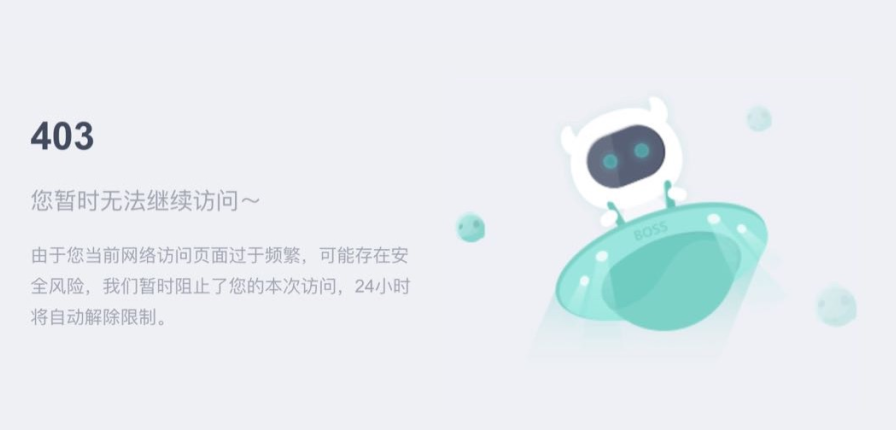

In [10]:
from IPython.display import Image
Image(filename='image4.png')

With regard to verification code, we used manual operators to avoid anti-scraping of website. We can access the verification code manually when the programme is interrupted by this system.  While about the 403 error, we changed our User-agent.

In the Requests library, the user is allowed to customize the request header information, so we change the value of the User-Agent in the request header, so that the server can be spoofed to achieve the purpose of bypassing the anti-crawler. 

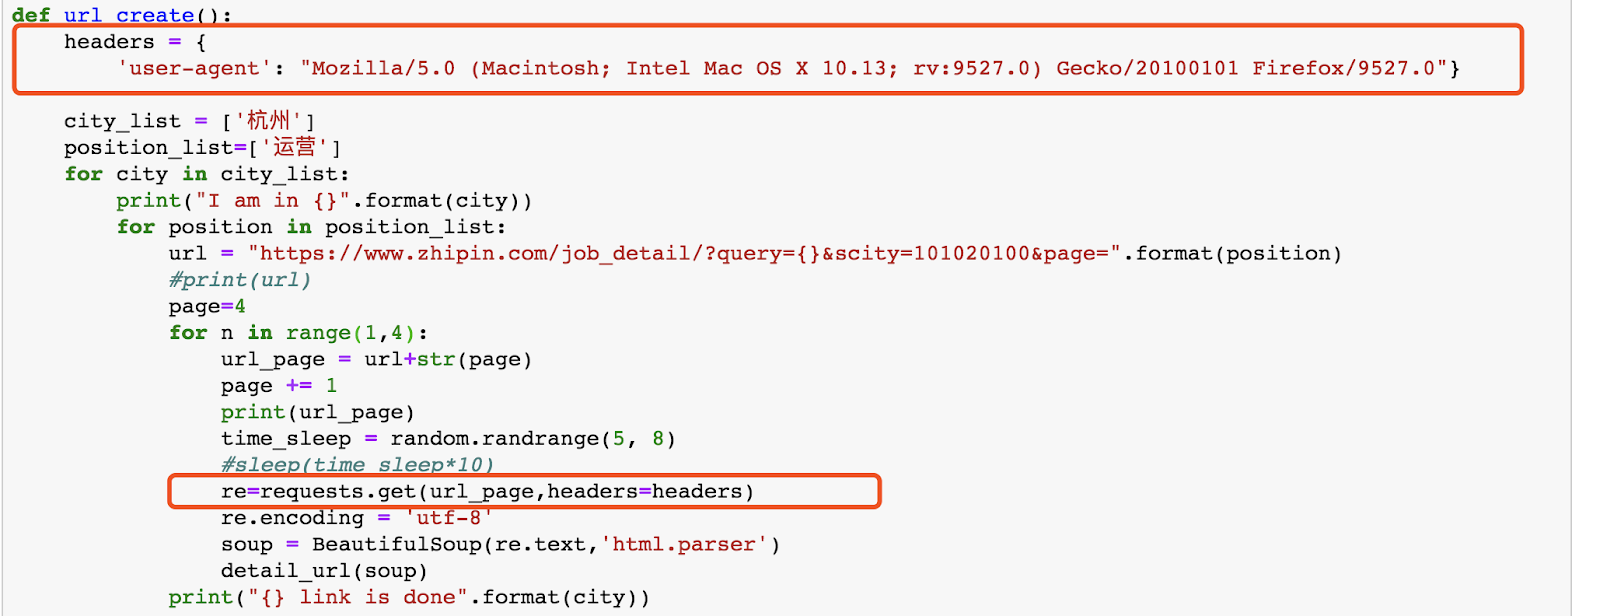

In [11]:
Image(filename='image5.png')

In the whole scraping process, we used several User-agent to fake our request header.

>Mozilla/5.0 (Windows; U; Windows NT 5.1) Gecko/20070309 Firefox/2.0.0.3

>Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36

>Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36

>Mozilla/5.0 (Xll; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2272.89 Safari/537.36

>Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36

### Data Cleaning

At last, a total of 1227 pieces of raw data are acquired finally and stored in CSV. We import separate csv files into Jupyter notebook and merge them into one data file. 

Raw data are dirty and unuseful. Thus the group should clean the data and transit them into orderly dataset.

In [18]:
import pandas as pd 
import numpy as np

In [19]:
# stretch Jupyter coding blocks to fit screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [21]:
df = pd.read_csv('media_operation_detail_all.csv')
df.head(10)
# if you left it empety, it will read 5 lines, want more ,add number

,publishTime,position,salary,companyName,companyType,companySize,responsibility,requirement
0,发布于2018-11-04 22:02,网站运营,6K-8K,搜房网房天下,互联网,已上市10000人以上,岗位职责：1、负责网站内容运营；2、指导地方运营工作，定期组织培训；3、配合市场活动，进行营...,城市：北京经验：1-3年学历：本科
1,发布于2018-05-19 14:27,活动运营,20K-40K,贝壳找房,移动互联网,C轮10000人以上,岗位要求1. 围绕业务场景策划各类线上、线下活动，以提升用户规模为核心运营指标，对活动...,城市：北京经验：3-5年学历：本科
2,发布于2018-11-13 10:17,用户运营,15K-20K,赛普健身学院,在线教育,已上市500-999人,岗位职责：1、负责用户运营管理，精准定位目标用户群，结合用户使用场景，建立相应的用户运营机制...,城市：北京经验：1年以内学历：本科
3,发布于2018-11-16 22:41,运营支持,6K-10K,嗖嗖快跑科技,互联网,B轮500-999人,我们希望您具有1一定的团队协作能力2一定的抗压力3闪闪发光的正能量4运营思维5不怕吃苦的精神...,城市：北京经验：经验不限学历：高中
4,发布于2018-11-16 18:08,用户运营,8K-13K,融360,互联网金融,已上市1000-9999人,1、 负责处理合伙人及其客户关于合伙人平台使用的问题、订单对账、需求反馈以及客诉投诉等问题，...,城市：北京经验：1-3年学历：本科
5,发布于2018-07-05 10:37,社群运营,8K-15K,VIPKID,移动互联网,D轮及以上10000人以上,社群运营岗位（用户增长方向）工作内容： 1、负责搭建和运营用户社群，完成社群运营流程的梳理与...,城市：北京经验：1-3年学历：本科
6,发布于2018-11-13 13:14,运营,3K-4K,好未来,互联网,已上市10000人以上,1、熟练掌握Excel，Word等办公软件；2、能动主动积极面对问题处理问题 ，尽量做到当日...,城市：北京经验：经验不限学历：大专
7,发布于2018-11-07 16:35,运营,7K-14K,金恪控股集团,互联网,未融资500-999人,岗位职责：1、参与及协助讲师团队对线上课程进⾏行行前期选题策划、质量量把关，制定课程产品的上...,城市：北京经验：3-5年学历：本科
8,发布于2018-10-31 21:10,推荐产品运营,8K-15K,省钱快报,电子商务,C轮100-499人,职位职责：1、评估优化推荐召回/排序策略，推动研发降低Badcase；2、负责提升省钱快报推...,城市：北京经验：1-3年学历：本科
9,发布于2018-11-09 11:17,高级运营,8K-12K,浪潮集团,计算机软件,已上市10000人以上,岗位职责：1、按照客户要求，制定业务运营计划并实施；完成各项运营数据及考核指标；提升平台及产...,城市：北京经验：3-5年学历：大专


Firstly describe the dataset to have a integrated look at it.

In [22]:
df.shape 
# (the number of cases/observations, the number of variables)

(1226, 8)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 8 columns):
publishTime       1226 non-null object
position          1226 non-null object
salary            1226 non-null object
companyName       1226 non-null object
companyType       1226 non-null object
companySize       1226 non-null object
responsibility    1226 non-null object
requirement       1226 non-null object
dtypes: object(8)
memory usage: 76.7+ KB


In [24]:
df.columns

Index(['publishTime', 'position', 'salary', 'companyName', 'companyType',
       'companySize', 'responsibility', 'requirement'],
      dtype='object')

1) drop repeated box and internship

We filter the repeated box header and repeated data initially because it will influence the cleaning of pure numeric data(salary). We drop repeated data by judging if there are repeated data of the publishTime, position and companyName.

In [25]:
# drop repeated data
df = df.drop_duplicates(subset = ['publishTime','position','companyName'],keep = 'first')

In [26]:
# drop repeated box
df.drop(df[df['salary'].str.contains('salary')].index, inplace=True)

2) Then, we delete the items which are internship jobs, then obtained 1168 pieces of data.

According to our observation,internship jobs recruitment information will clarify the internship situation through the statement of position and responsibility.


In [27]:
# drop internship
df.drop(df[df['position'].str.contains('实习')].index, inplace=True)
df.drop(df[df['responsibility'].str.contains('实习')].index, inplace=True)

3) divide requirements

Next, we can see that there are three different kinds of information in the requirement column, which includes city, experience and education. So we define a function to split the three items in ‘requirement’ into three separated columns.

As the code shows, we use define a division function which has two arguments, string and index. Firstly, we use ‘: ’ to split the string. Secondly, we use index to help us to output which information we want. For example, we want to divide city in the string. We assigned l[index] to ret, which means that we can get the second element in “l” list. Then if index is not equal to 3(this condition is set for scraping the education level), we use ret[:-2] to get “北京” from “北京经验”.  In this example, we see every word as an element in string. 


In [28]:
# devide requirements
df_requirement = pd.DataFrame(df['requirement'], columns = ["requirement"])
df_requirement.head()

,requirement
0,城市：北京经验：1-3年学历：本科
1,城市：北京经验：3-5年学历：本科
2,城市：北京经验：1年以内学历：本科
3,城市：北京经验：经验不限学历：高中
4,城市：北京经验：1-3年学历：本科


In [29]:
# removing the empty values 
df_requirement['requirement']=df_requirement['requirement'].fillna("")

In [30]:
# lower case 
df_requirement['requirement'] = df_requirement['requirement'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df_requirement['requirement'].head()

0    城市：北京经验：1-3年学历：本科
1    城市：北京经验：3-5年学历：本科
2    城市：北京经验：1年以内学历：本科
3    城市：北京经验：经验不限学历：高中
4    城市：北京经验：1-3年学历：本科
Name: requirement, dtype: object

In [31]:
df_requirement['requirement'].head(30)

0     城市：北京经验：1-3年学历：本科
1     城市：北京经验：3-5年学历：本科
2     城市：北京经验：1年以内学历：本科
3     城市：北京经验：经验不限学历：高中
4     城市：北京经验：1-3年学历：本科
5     城市：北京经验：1-3年学历：本科
7     城市：北京经验：3-5年学历：本科
8     城市：北京经验：1-3年学历：本科
9     城市：北京经验：3-5年学历：大专
10    城市：北京经验：1年以内学历：本科
11    城市：北京经验：3-5年学历：本科
12    城市：北京经验：1年以内学历：大专
13    城市：北京经验：1-3年学历：本科
15    城市：北京经验：经验不限学历：本科
16    城市：北京经验：1年以内学历：大专
17    城市：北京经验：1-3年学历：大专
19    城市：北京经验：1-3年学历：大专
20    城市：北京经验：经验不限学历：本科
21    城市：北京经验：1年以内学历：大专
22    城市：北京经验：1-3年学历：大专
23    城市：北京经验：1年以内学历：本科
25    城市：北京经验：1-3年学历：本科
26    城市：北京经验：经验不限学历：本科
28    城市：北京经验：1-3年学历：本科
30     城市：北京经验：应届生学历：大专
31    城市：北京经验：经验不限学历：本科
32    城市：北京经验：经验不限学历：大专
33    城市：北京经验：经验不限学历：本科
34    城市：北京经验：3-5年学历：大专
36    城市：北京经验：1-3年学历：大专
Name: requirement, dtype: object

In [32]:
def division(string, index):
    l = string.split('：')
    print(l)
    if len(l) <= index:
        return ''
    ret = l[index]
    if index != 3:
        ret = ret[:-2]
    return ret.strip(' ')

df['requirement_city'] = df['requirement'].map(lambda x: division(x, 1))
df['requirement_exp'] = df['requirement'].map(lambda x: division(x, 2))
df['requirement_edu'] = df['requirement'].map(lambda x: division(x, 3))

['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '3-5年学历', '本科']
['城市', '北京经验', '1年以内学历', '本科']
['城市', '北京经验', '经验不限学历', '高中']
['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '3-5年学历', '本科']
['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '3-5年学历', '大专']
['城市', '北京经验', '1年以内学历', '本科']
['城市', '北京经验', '3-5年学历', '本科']
['城市', '北京经验', '1年以内学历', '大专']
['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '经验不限学历', '本科']
['城市', '北京经验', '1年以内学历', '大专']
['城市', '北京经验', '1-3年学历', '大专']
['城市', '北京经验', '1-3年学历', '大专']
['城市', '北京经验', '经验不限学历', '本科']
['城市', '北京经验', '1年以内学历', '大专']
['城市', '北京经验', '1-3年学历', '大专']
['城市', '北京经验', '1年以内学历', '本科']
['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '经验不限学历', '本科']
['城市', '北京经验', '1-3年学历', '本科']
['城市', '北京经验', '应届生学历', '大专']
['城市', '北京经验', '经验不限学历', '本科']
['城市', '北京经验', '经验不限学历', '大专']
['城市', '北京经验', '经验不限学历', '本科']
['城市', '北京经验', '3-5年学历', '大专']
['城市', '北京经验', '1-3年学历', '大专']
['城市', '北京经验', '经验不限学历', '大专']
['城市', '北京经验', '经验不限学历', '大专']
['城市', '北

['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '3-5年学历', '本科']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '1-3年学历', '本科']
['城市', '深圳经验', '3-5年学历', '大专']
['城市', '深圳经验', '3-5年学历', '本科']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '1年以内学历', '不限']
['城市', '深圳经验', '1-3年学历', '本科']
['城市', '深圳经验', '3-5年学历', '本科']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '3-5年学历', '大专']
['城市', '深圳经验', '5-10年学历', '大专']
['城市', '深圳经验', '经验不限学历', '大专']
['城市', '深圳经验', '3-5年学历', '大专']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '经验不限学历', '大专']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '5-10年学历', '本科']
['城市', '深圳经验', '经验不限学历', '本科']
['城市', '深圳经验', '1-3年学历', '本科']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '3-5年学历', '大专']
['城市', '深圳经验', '3-5年学历', '本科']
['城市', '深圳经验', '1年以内学历', '本科']
['城市', '深圳经验', '3-5年学历', '大专']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '应届生学历', '大专']
['城市', '深圳经验', '5-10年学历', '本科']
['城市', '深圳经验', '1-3年学历', '大专']
['城市', '深圳经验', '5-10年学历', '不限']
['城市'

4) drop meaningless data

We delete the items whose education requirements and experience are unlimited, which will not show on our data analysis.

In [33]:
df.drop(df[df['requirement_exp'].str.contains('经验不限')].index, inplace=True)
print(df.describe())
df.drop(df[df['requirement_edu'].str.contains('不限')].index, inplace=True)
print(df.describe())

                publishTime position   salary companyName companyType  \
count                   939      939      939         939         939   
unique                  919      240      106         621          48   
top     发布于2018-11-19 15:12     产品运营  10K-20K        软通动力         互联网   
freq                      4       64       55          18         236   

        companySize                                     responsibility  \
count           939                                                939   
unique           46                                                920   
top     已上市10000人以上  岗位职责：1、负责制定雪梨商学院app整体运营推广策略，提升APP在各平台的排名，下载量，注...   
freq            130                                                  4   

              requirement requirement_city requirement_exp requirement_edu  
count                 939              939             939             939  
unique                 71                4               6               6  
top     城市：广州经验：1-3年学历：大专       

5) process salaries

As for salary here, we can see that the data in salary column is a range instead of single numeric, which is not suitable for analyzing. So we decide to get mean salary of the range. We use “-” to split this range, replace  “K” with “000”  and change the string to numeric for the convenience of calculation. After that, we calculate the average salary and use map to add ‘avg_salary’ to our data frame.


In [34]:
# Get mean of salaries
def clear_salary(string):
    salary_list = string.replace("K", "000").split("-")
    salary_list = [int(x) for x in salary_list]
    avg_item = (salary_list[0] + salary_list[1]) / 2
    return avg_item

df['avg_salary'] = df['salary'].map(lambda x: clear_salary(x))

After the four cleaning steps above, we can get a consistent data(screenshot are as follows).

Then we can enter next visualization stage.

In [35]:
df.head(20)

,publishTime,position,salary,companyName,companyType,companySize,responsibility,requirement,requirement_city,requirement_exp,requirement_edu,avg_salary
0,发布于2018-11-04 22:02,网站运营,6K-8K,搜房网房天下,互联网,已上市10000人以上,岗位职责：1、负责网站内容运营；2、指导地方运营工作，定期组织培训；3、配合市场活动，进行营...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,7000.0
1,发布于2018-05-19 14:27,活动运营,20K-40K,贝壳找房,移动互联网,C轮10000人以上,岗位要求1. 围绕业务场景策划各类线上、线下活动，以提升用户规模为核心运营指标，对活动...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,30000.0
2,发布于2018-11-13 10:17,用户运营,15K-20K,赛普健身学院,在线教育,已上市500-999人,岗位职责：1、负责用户运营管理，精准定位目标用户群，结合用户使用场景，建立相应的用户运营机制...,城市：北京经验：1年以内学历：本科,北京,1年以内,本科,17500.0
4,发布于2018-11-16 18:08,用户运营,8K-13K,融360,互联网金融,已上市1000-9999人,1、 负责处理合伙人及其客户关于合伙人平台使用的问题、订单对账、需求反馈以及客诉投诉等问题，...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,10500.0
5,发布于2018-07-05 10:37,社群运营,8K-15K,VIPKID,移动互联网,D轮及以上10000人以上,社群运营岗位（用户增长方向）工作内容： 1、负责搭建和运营用户社群，完成社群运营流程的梳理与...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,11500.0
7,发布于2018-11-07 16:35,运营,7K-14K,金恪控股集团,互联网,未融资500-999人,岗位职责：1、参与及协助讲师团队对线上课程进⾏行行前期选题策划、质量量把关，制定课程产品的上...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,10500.0
8,发布于2018-10-31 21:10,推荐产品运营,8K-15K,省钱快报,电子商务,C轮100-499人,职位职责：1、评估优化推荐召回/排序策略，推动研发降低Badcase；2、负责提升省钱快报推...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,11500.0
9,发布于2018-11-09 11:17,高级运营,8K-12K,浪潮集团,计算机软件,已上市10000人以上,岗位职责：1、按照客户要求，制定业务运营计划并实施；完成各项运营数据及考核指标；提升平台及产...,城市：北京经验：3-5年学历：大专,北京,3-5年,大专,10000.0
10,发布于2018-11-19 20:21,APP运营,7K-9K,赛普健身学院,在线教育,已上市500-999人,岗位职责：1、负责收集和整理日常运营更新的内容；2、负责收集和整理用户提出的反馈意见，并进行...,城市：北京经验：1年以内学历：本科,北京,1年以内,本科,8000.0
11,发布于2018-11-02 20:27,活动运营,10K-20K,京东集团,电子商务,已上市10000人以上,新通路事业部承接京东线下拓展全部业务（具体自行百度）岗位职责：分别负责母婴、宠物、文具、酒水...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,15000.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 885 entries, 0 to 1225
Data columns (total 12 columns):
publishTime         885 non-null object
position            885 non-null object
salary              885 non-null object
companyName         885 non-null object
companyType         885 non-null object
companySize         885 non-null object
responsibility      885 non-null object
requirement         885 non-null object
requirement_city    885 non-null object
requirement_exp     885 non-null object
requirement_edu     885 non-null object
avg_salary          885 non-null float64
dtypes: float64(1), object(11)
memory usage: 89.9+ KB


In [37]:
print(df.describe())

          avg_salary
count     885.000000
mean    12809.039548
std     10769.685106
min      2500.000000
25%      7500.000000
50%     10000.000000
75%     15000.000000
max    230000.000000


In [38]:
sdata = pd.DataFrame (df)
sdata.to_csv ("operation_job_cleaning2.csv", index=False, encoding = "utf-8")

### Data Visualization

We will start from importing consistent data here.There are 885 consistent operator recruitment records here for us to analyze.

#### Q1. Which city will offer highest salary for operators?

The average salary of all four first-tier cities(Beijing, Shanghai, Guangzhou, Shenzhen) is 12,809 yuan, the maximum is 230,000 yuan while the minimum salary of operators is 2,500 yuan.  From the histogram below, the distribution of salary is significantly right skewed. It suits the marketing regulations. Few people can get significantly high salary.


In [39]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [40]:
# stretch Jupyter coding blocks to fit screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [41]:
df = pd.read_csv('operation_job_cleaning2.csv')
df.head(5)

,publishTime,position,salary,companyName,companyType,companySize,responsibility,requirement,requirement_city,requirement_exp,requirement_edu,avg_salary
0,发布于2018-11-04 22:02,网站运营,6K-8K,搜房网房天下,互联网,已上市10000人以上,岗位职责：1、负责网站内容运营；2、指导地方运营工作，定期组织培训；3、配合市场活动，进行营...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,7000.0
1,发布于2018-05-19 14:27,活动运营,20K-40K,贝壳找房,移动互联网,C轮10000人以上,岗位要求1. 围绕业务场景策划各类线上、线下活动，以提升用户规模为核心运营指标，对活动...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,30000.0
2,发布于2018-11-13 10:17,用户运营,15K-20K,赛普健身学院,在线教育,已上市500-999人,岗位职责：1、负责用户运营管理，精准定位目标用户群，结合用户使用场景，建立相应的用户运营机制...,城市：北京经验：1年以内学历：本科,北京,1年以内,本科,17500.0
3,发布于2018-11-16 18:08,用户运营,8K-13K,融360,互联网金融,已上市1000-9999人,1、 负责处理合伙人及其客户关于合伙人平台使用的问题、订单对账、需求反馈以及客诉投诉等问题，...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,10500.0
4,发布于2018-07-05 10:37,社群运营,8K-15K,VIPKID,移动互联网,D轮及以上10000人以上,社群运营岗位（用户增长方向）工作内容： 1、负责搭建和运营用户社群，完成社群运营流程的梳理与...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,11500.0


In [42]:
df.info

<bound method DataFrame.info of              publishTime   position   salary companyName companyType  \
0    发布于2018-11-04 22:02       网站运营    6K-8K      搜房网房天下         互联网   
1    发布于2018-05-19 14:27       活动运营  20K-40K        贝壳找房       移动互联网   
2    发布于2018-11-13 10:17       用户运营  15K-20K      赛普健身学院        在线教育   
3    发布于2018-11-16 18:08       用户运营   8K-13K        融360       互联网金融   
4    发布于2018-07-05 10:37       社群运营   8K-15K      VIPKID       移动互联网   
5    发布于2018-11-07 16:35         运营   7K-14K      金恪控股集团         互联网   
6    发布于2018-10-31 21:10     推荐产品运营   8K-15K        省钱快报        电子商务   
7    发布于2018-11-09 11:17       高级运营   8K-12K        浪潮集团       计算机软件   
8    发布于2018-11-19 20:21      APP运营    7K-9K      赛普健身学院        在线教育   
9    发布于2018-11-02 20:27       活动运营  10K-20K        京东集团        电子商务   
10   发布于2018-11-11 22:30       社区运营   8K-15K        中国平安       互联网金融   
11   发布于2018-11-16 18:06       社群运营  12K-24K        融360       互联网金融   
12   发布于2018-11-14 00:14       用

In [43]:
df.describe() 

,avg_salary
count,885.000000
mean,12809.039548
std,10769.685106
min,2500.000000
25%,7500.000000
50%,10000.000000
75%,15000.000000
max,230000.000000


In [44]:
BJ = df[df['requirement_city'].str.contains('北京')] 
BJ.describe()

,avg_salary
count,217.000000
mean,13283.410138
std,7704.562224
min,2500.000000
25%,8000.000000
50%,11500.000000
75%,15000.000000
max,60000.000000


In [45]:
SH = df[df['requirement_city'].str.contains('上海')] 
SH.describe()

,avg_salary
count,229.000000
mean,15622.270742
std,17073.958885
min,4500.000000
25%,8500.000000
50%,11500.000000
75%,19500.000000
max,230000.000000


In [46]:
GZ = df[df['requirement_city'].str.contains('广州')] 
GZ.describe()

,avg_salary
count,207.000000
mean,9978.260870
std,6423.996342
min,3500.000000
25%,6000.000000
50%,8000.000000
75%,11500.000000
max,40000.000000


In [47]:
SZ = df[df['requirement_city'].str.contains('深圳')] 
SZ.describe()

,avg_salary
count,232.000000
mean,12114.224138
std,6935.142661
min,3500.000000
25%,7500.000000
50%,10000.000000
75%,14000.000000
max,47500.000000


In [48]:
# Adjust the font
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
#plt.rcParams['font.family'] = 'WeiRuanYaHei-1.ttf'
#plt.rcParams['font.serif'] = 'WeiRuanYaHei-1.ttf'
#fontproperties = font
from matplotlib.font_manager import _rebuild
_rebuild() #reload一下
#matplotlib.get_cachedir()

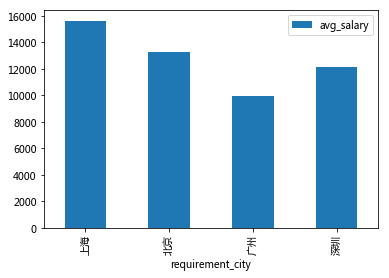

In [49]:
# Bar graph to compare average salary in different cities 不同城市的平均薪资对比柱状图
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Users/heweiyuan/py/COM5507/project/WeiRuanYaHei-1.ttf',size=14)
fontproperties = font
df.groupby(u'requirement_city').mean().plot(kind='bar')

The maximum salary is for a operation VP, which reaches 230,000 yean a month.

In [50]:
#highest
df[df['avg_salary']==230000.000000] 

,publishTime,position,salary,companyName,companyType,companySize,responsibility,requirement,requirement_city,requirement_exp,requirement_edu,avg_salary
329,发布于2018-11-14 16:50,运营VP,200K-260K,海风教育,在线教育,C轮1000-9999人,属于内部运营高管职位，汇报CEO，请私信我面议！,城市：上海经验：5-10年学历：本科,上海,5-10年,本科,230000.0


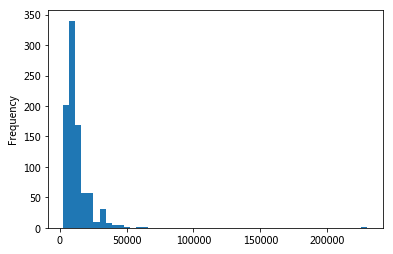

In [51]:
#平均薪资分布图
df.avg_salary.plot.hist(bins=50)

From the bar chart, it can be seen that Shanghai will offer the highest average salary for operation talents and Guangzhou will offer the relatively lowest average salary for operators. After combining observation and economic status of these four cities, it is reasonable to display in this way. In Guangzhou, the living consumption and house rent is relatively low compared to other first-tier cities. 


#### Q2. Which kind of operators will be highest in demand?

As we can see on the graph below, product operators are highest in demand. The user operators, content operators, e-commerce operators,sales operators, community operators, sales operators, and data operators are listed in descending order. 


In [52]:
# Recode the same kind of operations
import sys
pdf = df
pro_pos =[]
for i in pdf['position']:
    if i.__contains__('产品运营'):
        pro_pos.append(True)
    else:
        pro_pos.append(False)
pdf['position'][pro_pos]  = '产品运营'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [53]:
pro_user =[]
for i in pdf['position']:
    if i.__contains__('用户运营'):
        pro_user.append(True)
    else:
        pro_user.append(False)
pdf['position'][pro_user]  = '用户运营'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [54]:
pro_con =[]
for i in pdf['position']:
    if i.__contains__('内容运营'):
        pro_con.append(True)
    else:
        pro_con.append(False)
pdf['position'][pro_con]  = '内容运营'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [55]:
pro_eco =[]
for i in pdf['position']:
    if i.__contains__('速卖通运营'and'天猫运营'):
        pro_eco.append(True)
    else:
        pro_eco.append(False)
pdf['position'][pro_eco]  = '电商运营'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [56]:
pos = pdf['position']
data_pos = pos.str.contains('数据运营')
# contians of oxford
pdf['position'] = np.where(data_pos, '数据运营', 
                                      pos.str.replace('-', ' '))

In [57]:
# Descrbie the number of different kinds of operation 职位数量
pdf.position.value_counts()

产品运营        88
用户运营        55
内容运营        50
运营经理        43
运营总监        41
社群运营        40
电商运营        36
运营助理        35
销售运营        31
运营          31
运营专员        23
数据运营        23
运营主管        21
活动运营        19
运营助理/专员     13
游戏运营        13
商家运营        12
社区运营         9
速卖通运营        7
网站运营         7
渠道运营         7
商品运营         7
亚马逊运营        6
品类运营         6
APP运营        6
运营督导         6
运营编辑         6
类目运营         6
运营经理/主管      5
高级运营经理       5
            ..
讲师管理/运营      1
类目运营总监       1
广告运营产品       1
商务活动运营       1
RBA民宿运营岗     1
运营商项目经理      1
B2C运营总监      1
运营负责人        1
品类运营专家       1
招商运营经理       1
学员运营经理       1
安全运营         1
运营 部经理       1
电商运营主管       1
选品运营         1
运营策划         1
科室行政运营       1
商户运营经理       1
电商运营专员       1
频道运营         1
运营讲师         1
媒体运营主管       1
运营店长         1
用户社群运营       1
商品运营组长       1
运营区域经理       1
品类运营负责人      1
Amazon运营     1
媒体运营         1
场馆运营         1
Name: position, Length: 195, dtype: int64

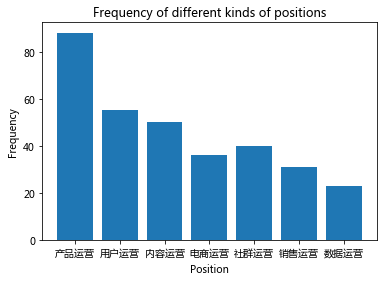

In [59]:
#工作经验分布直方图
#绘制柱状图
def drawBar(poss):
    xticks=['产品运营','用户运营','内容运营','电商运营','社群运营','销售运营','数据运营']
    num_poss = {}
    font = FontProperties(fname=r"/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/WeiRuanYaHei-1.ttf",size=10)
    #对每一类成绩进行频数统计
    for pos in poss:
        num_poss[pos] = num_poss.get(pos, 0) + 1
   #创建柱状图
   #第一个参数为柱的横坐标 
   #第二个参数为柱的高度
   #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(7), [num_poss.get(xtick, 0) for xtick in xticks], align='center')
    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(7), xticks,fontproperties=font)
    #设置横坐标的文字说明
    pyplot.xlabel('Position')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Frequency of different kinds of positions')
    #绘图
    pyplot.show()    

poss = pdf.position
drawBar(poss)

#### Q3. How many years of operation working experience are in higher demand? & Is longer operation working experience related to higher salary?

As the graph shows below, most positions need 1 to 3 years’ experience, 3 to 5 years is the following one. Only 3 positions require above 10 years’ working experience, accounting for 0.25% of the dataset. The fresh graduates are the second least-demand, which indicates that the position of operators needs applicants with some working experience. Also, employee with above 5 years’ experience is in low-demand shows that the industry is relatively young, few people persists more than five years.

In [ ]:
#工作经验要求分布
df.requirement_exp.value_counts()

In [ ]:
import matplotlib.font_manager

Text(0.5,1,'Salary of different working experience')

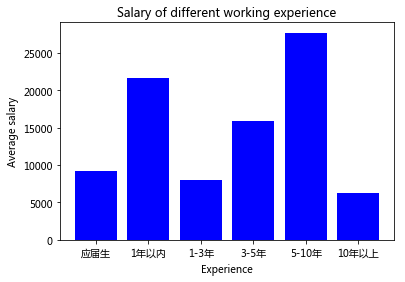

In [60]:
#不同经验的平均工资
from matplotlib.font_manager import FontProperties
xticks=['应届生','1年以内','1-3年','3-5年','5-10年','10年以上']
font = FontProperties(fname=r"/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/WeiRuanYaHei-1.ttf", size=10)
fontproperties = font
#df.groupby(u'requirement_exp').mean().plot(kind='bar')
plt.bar(range(6), df['avg_salary'].groupby(df[u'requirement_exp']).mean(),color='blue')
plt.xticks(range(6),xticks,fontproperties=font) ## 可以设置坐标字
plt.xlabel('Experience')
#设置纵坐标的文字说明
plt.ylabel('Average salary')
#设置标题
plt.title('Salary of different working experience')
#绘图

Speaking of working experience, we can see if longer operation working experience means a higher salary. 

From bar chart, We can see that the average of salaries of operators within 3 years is generally below 10000. While operators with over 3 years working experience can try to ask for more than 15000 one month. When operators work in this field over 5 years, they can gain over 20000 per month. The salary can jump greatly in different stages. 

NameError: name 'ax' is not defined

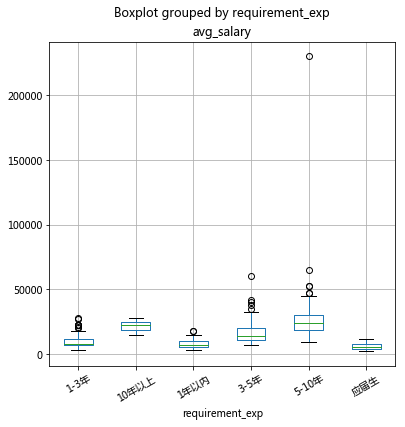

In [61]:
xticks=['应届生','1年以内','1-3年','3-5年','5-10年','10年以上']
df.boxplot('avg_salary','requirement_exp',rot = 30,figsize=(6,6))
ax.set_xticks(range(6))
ax.set_xticklabels(range(6))
plt.show()

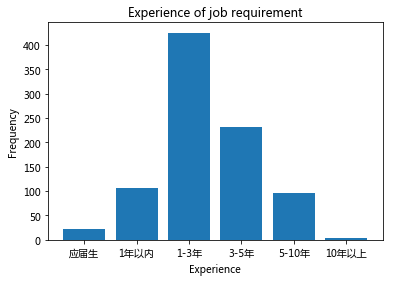

In [63]:
#工作经验分布直方图
#绘制柱状图
def drawBar(exps):
    xticks=['应届生','1年以内','1-3年','3-5年','5-10年','10年以上']
    num_exps = {}
    font = FontProperties(fname=r"/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/WeiRuanYaHei-1.ttf",size=10)
    #对每一类成绩进行频数统计
    for exp in exps:
        num_exps[exp] = num_exps.get(exp, 0) + 1
   #创建柱状图
   #第一个参数为柱的横坐标 
   #第二个参数为柱的高度
   #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(6), [num_exps.get(xtick, 0) for xtick in xticks], align='center')
    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(6), xticks,fontproperties=font)
    #设置横坐标的文字说明
    pyplot.xlabel('Experience')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Experience of job requirement')
    #绘图
    pyplot.show()    

exps = df.requirement_exp
drawBar(exps)

In [64]:
hdf= df[df['requirement_exp'].str.contains('5-10年'or'10年以上')]
hdf.head(20)

,publishTime,position,salary,companyName,companyType,companySize,responsibility,requirement,requirement_city,requirement_exp,requirement_edu,avg_salary
34,发布于2018-10-25 15:11,产品运营,15K-20K,京东集团,电子商务,已上市10000人以上,岗位描述：1.负责京东pop的平台产品运营类项目的管理工作，策略制定项目跟进；2.协调各事业...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,17500.0
43,发布于2018-11-16 13:59,运营经理,15K-25K,文思海辉,计算机软件,已上市10000人以上,主要负责部门内部的运营管理，具体包括成本管理、运营分析等内容,城市：北京经验：5-10年学历：大专,北京,5-10年,大专,20000.0
66,发布于2018-11-13 11:25,运营,15K-20K,尤尼天承文化传播,电子商务,不需要融资20-99人,"你好！我们是经营YONEX品牌系列产品,其天猫店铺有“元国顺运动户外专营”和“尤尼天承专卖店...",城市：北京经验：5-10年学历：大专,北京,5-10年,大专,17500.0
67,发布于2018-09-21 09:15,用户运营,20K-35K,中华会计网校,在线教育,已上市1000-9999人,岗位职责：1、 负责公司会员权益及成长体系搭建，通过用户触达、分层管理、活动策划、权益包装等...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,27500.0
69,发布于2018-09-25 15:17,运营经理/主管,10K-20K,美菜网,移动互联网,D轮及以上10000人以上,岗位职责： 1、根据公司发展战略及美鲜商城业务规划，总体负责商城运营管理，带领团队完成商城业...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,15000.0
72,发布于2018-10-31 17:11,微商运营,10K-20K,云聚同新,移动互联网,不需要融资10000人以上,岗位胜任能力和技能要求：1. 本科以上学历，专业不限；2. 有独立完成过用户成长体系搭建，至...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,15000.0
73,发布于2018-10-17 16:32,品牌运营经理,30K-60K,京东集团,电子商务,已上市10000人以上,品牌运营总监岗位职责：1、品牌资产运营：根据品牌规划和品牌策略，对四季优选所拥有的各业态品牌...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,45000.0
86,发布于2018-08-20 18:01,运营总监,25K-35K,七扇门科技,O2O,未融资100-499人,岗位概要： ...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,30000.0
89,发布于2018-10-19 10:38,销售运营,20K-40K,北森云计算,移动互联网,D轮及以上1000-9999人,总监级管理岗位，特别优秀的话，职位和薪资另议。500人以上的复杂销售组织;B2B 方案式销售...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,30000.0
97,发布于2018-11-09 14:59,商务运营经理,15K-20K,元海慧诚,互联网金融,C轮1000-9999人,岗位描述：1、对接甲方，完成项目合同落地内容等各种细节内容2、配合市场拓展部区域／线上渠道运...,城市：北京经验：5-10年学历：本科,北京,5-10年,本科,17500.0


In [65]:
# Descrbie the number of different kinds of operation 职位数量
hdf.shape

(96, 12)

In [66]:
hdf= hdf[hdf['responsibility'].str.contains('管理' or '总监')]
hdf.shape

(76, 12)

In the box plot, there are several discrete numeric values in the “3-5 years” and “5-10 years” variables. We are not pretty sure about the relationship between the experience and salary from the box plot.

After recoding the experience, we use anova to test our assumption.

In [67]:
#Recode
cleanup_nums = {"requirement_exp":{"1-3年": 2, "3-5年": 3, "经验不限": 88,"1年以内":1, "5-10年":4, "应届生":0, "10年以上":5 },
                "requirement_edu": {"初中及以下": 0, "中专/中技": 1, "高中": 2, "大专": 3,"本科": 4, "硕士": 5, "博士":6, "不限":88 } }

In [68]:
df["requirement_exp"].value_counts()
df["requirement_edu"].value_counts()

本科       470
大专       397
中专/中技      8
高中         7
硕士         3
Name: requirement_edu, dtype: int64

In [69]:
#df.replace(cleanup_nums, inplace=True)
df.head(10)

,publishTime,position,salary,companyName,companyType,companySize,responsibility,requirement,requirement_city,requirement_exp,requirement_edu,avg_salary
0,发布于2018-11-04 22:02,网站运营,6K-8K,搜房网房天下,互联网,已上市10000人以上,岗位职责：1、负责网站内容运营；2、指导地方运营工作，定期组织培训；3、配合市场活动，进行营...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,7000.0
1,发布于2018-05-19 14:27,活动运营,20K-40K,贝壳找房,移动互联网,C轮10000人以上,岗位要求1. 围绕业务场景策划各类线上、线下活动，以提升用户规模为核心运营指标，对活动...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,30000.0
2,发布于2018-11-13 10:17,用户运营,15K-20K,赛普健身学院,在线教育,已上市500-999人,岗位职责：1、负责用户运营管理，精准定位目标用户群，结合用户使用场景，建立相应的用户运营机制...,城市：北京经验：1年以内学历：本科,北京,1年以内,本科,17500.0
3,发布于2018-11-16 18:08,用户运营,8K-13K,融360,互联网金融,已上市1000-9999人,1、 负责处理合伙人及其客户关于合伙人平台使用的问题、订单对账、需求反馈以及客诉投诉等问题，...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,10500.0
4,发布于2018-07-05 10:37,社群运营,8K-15K,VIPKID,移动互联网,D轮及以上10000人以上,社群运营岗位（用户增长方向）工作内容： 1、负责搭建和运营用户社群，完成社群运营流程的梳理与...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,11500.0
5,发布于2018-11-07 16:35,运营,7K-14K,金恪控股集团,互联网,未融资500-999人,岗位职责：1、参与及协助讲师团队对线上课程进⾏行行前期选题策划、质量量把关，制定课程产品的上...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,10500.0
6,发布于2018-10-31 21:10,产品运营,8K-15K,省钱快报,电子商务,C轮100-499人,职位职责：1、评估优化推荐召回/排序策略，推动研发降低Badcase；2、负责提升省钱快报推...,城市：北京经验：1-3年学历：本科,北京,1-3年,本科,11500.0
7,发布于2018-11-09 11:17,高级运营,8K-12K,浪潮集团,计算机软件,已上市10000人以上,岗位职责：1、按照客户要求，制定业务运营计划并实施；完成各项运营数据及考核指标；提升平台及产...,城市：北京经验：3-5年学历：大专,北京,3-5年,大专,10000.0
8,发布于2018-11-19 20:21,APP运营,7K-9K,赛普健身学院,在线教育,已上市500-999人,岗位职责：1、负责收集和整理日常运营更新的内容；2、负责收集和整理用户提出的反馈意见，并进行...,城市：北京经验：1年以内学历：本科,北京,1年以内,本科,8000.0
9,发布于2018-11-02 20:27,活动运营,10K-20K,京东集团,电子商务,已上市10000人以上,新通路事业部承接京东线下拓展全部业务（具体自行百度）岗位职责：分别负责母婴、宠物、文具、酒水...,城市：北京经验：3-5年学历：本科,北京,3-5年,本科,15000.0


In [70]:
#多因素方差分析
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('avg_salary ~ requirement_edu+requirement_exp',df).fit()
anova_results = anova_lm(model)
print(anova_results)

                    df        sum_sq       mean_sq          F        PR(>F)
requirement_edu    4.0  8.008530e+09  2.002133e+09  25.687185  3.766752e-20
requirement_exp    5.0  2.632320e+10  5.264639e+09  67.544861  9.847942e-60
Residual         875.0  6.820000e+10  7.794286e+07        NaN           NaN


In [71]:
#effect size of experience
esq_sm_exp = anova_results['sum_sq'][0]/(anova_results['sum_sq'][0]+anova_results['sum_sq'][1])
print(esq_sm_exp)

0.2332690754413398


In [72]:
#effect sizes of education
esq_sm_edu = anova_results['sum_sq'][0]/(anova_results['sum_sq'][0]+anova_results['sum_sq'][2])
print(esq_sm_edu)

0.1050870593297226


The result showed that there was a significant effect of working experience on the salary at the p<.05 level. 

According to the responsibilities of these positions, we can find that all the position which demand over 5 years refers to the management responsibility. Overall, almost all the operations will transfer to manager to add value for themselves.

#### Q4. Which level of education are most required for operators?

The most welcome academic degree is bachelor’s degree. What comes next is associate degree. The position of operators somewhat needs people who are highly-educated. But bachelor’s degree is enough for this position since master’s degree is not so needed indicated by the bar chart.
The average salary ascends with education degree expect for the associate degree whose average salary is unexpectedly lower than the technical school graduates’.

In [73]:
#学历要求分布
df.requirement_edu.value_counts()

本科       470
大专       397
中专/中技      8
高中         7
硕士         3
Name: requirement_edu, dtype: int64

In [80]:
import pandas as pd 
import matplotlib
from matplotlib import pyplot
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

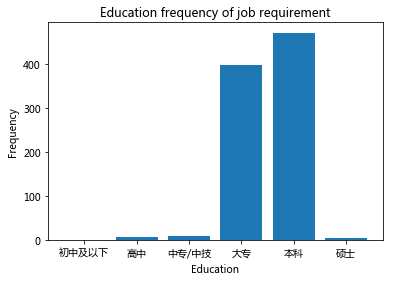

In [82]:
#公司类型分布直方图
#绘制柱状图
def drawBar_type(types):
    xticks=['初中及以下','高中','中专/中技','大专','本科','硕士']
    num_exps = {}
    #对每一类成绩进行频数统计
    for edu in edus:
        num_exps[edu] = num_exps.get(edu, 0) + 1
   #创建柱状图
   #第一个参数为柱的横坐标 
   #第二个参数为柱的高度
   #参数align为柱的对齐方式，以第一个参数为参考标准
    pyplot.bar(range(6), [num_exps.get(xtick, 0) for xtick in xticks], align='center')
    #设置柱的文字说明
    #第一个参数为文字说明的横坐标
    #第二个参数为文字说明的内容
    pyplot.xticks(range(6), xticks)
    #设置横坐标的文字说明
    pyplot.xlabel('Education')
    #设置纵坐标的文字说明
    pyplot.ylabel('Frequency')
    #设置标题
    pyplot.title('Education frequency of job requirement')
    #绘图
    pyplot.show()

edus = df.requirement_edu
drawBar_type(edus)

#### Q5.  Of which company types the demand for operations is highest?

Among the 51 types of company, the Internet industry is the largest employer of operator, far more than other company types with a figure of nearly 280 positions of operator are released by Internet company. Electronic commerce, mobile internet, online education, i-finance and software come after.

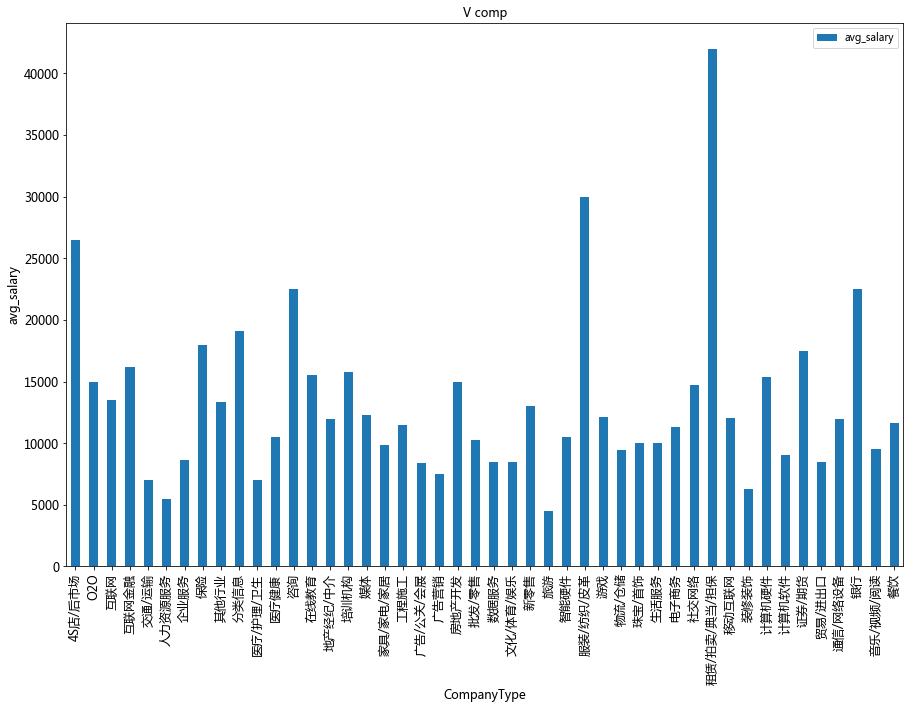

In [79]:
#不同companyType的平均工资
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

font = FontProperties(fname=r"/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/WeiRuanYaHei-1.ttf",size=10)
fontproperties = font
s_df=df.groupby(u'companyType').mean()
#print(s_df)
ax = s_df.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CompanyType", fontsize=12)
ax.set_ylabel("avg_salary",fontsize=12)
plt.show()

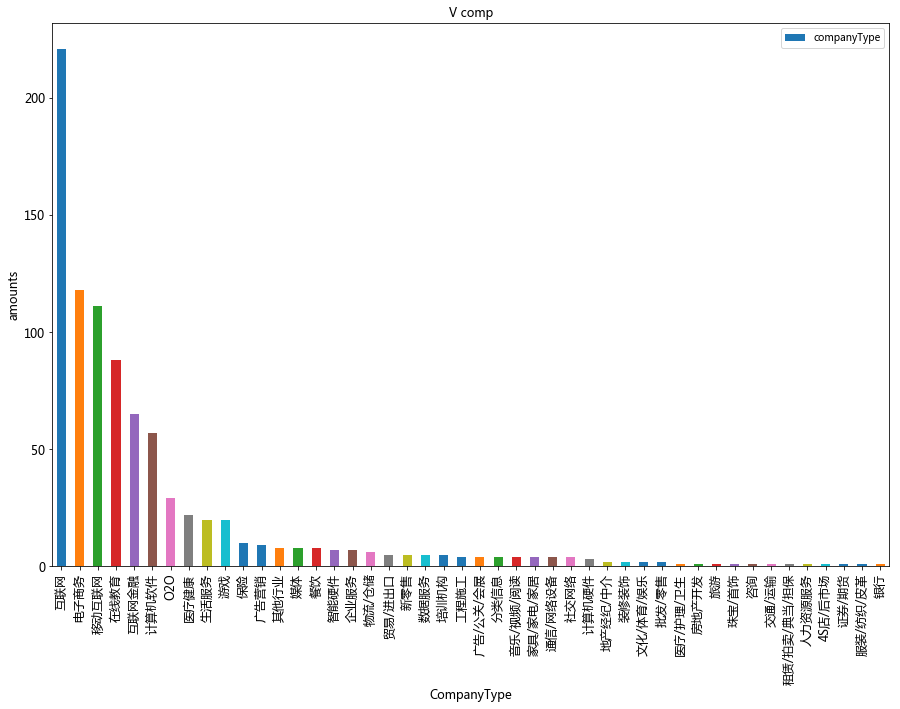

In [83]:
c_df=df["companyType"].value_counts()
ax = c_df.plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("CompanyType", fontsize=12)
ax.set_ylabel("amounts", fontsize=12)
plt.show()

The average salary in different type of company differs from one another.

Excluding the outlier, the only one demand in pawn industry, the average salary is relatively high in garment and textile industry, 4S store, consulting company and bank.

#### Q6. Which kind of abilities company want most?

After test the word frequency in the description of responsibility, we find the words USER, EXPERIENCE and PRODUCT are the most frequently occuring words in responsibility. Also, the words ACTIVITY, DATA and ANALYSE appear quite frequently.


In [84]:
!pip install wordcloud
!pip install jieba

In [85]:
import pandas as pd
import numpy as np
import jieba
import jieba.analyse
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os

In [86]:
import matplotlib.pyplot as plt
import matplotlib
import re
matplotlib.style.use('ggplot')
%matplotlib inline
from PIL import Image
import matplotlib.image as mpimg

In [87]:
#df_responsibility = pd.DataFrame(df['responsibility'], columns = ["responsibility"])
#df_responsibility.head(10)
responsibilities = df['responsibility']
print(type(responsibilities))

<class 'pandas.core.series.Series'>


In [88]:
action = ''
for kw in df['responsibility']:
      action += kw.strip() + ' '
#print(action)

In [89]:
action = action.encode("utf8").decode("utf8")
string = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+","",action)
string = re.sub("\d+","",string)
string = re.sub('^(Title|cmp|cmpesc:)(.+):(.*)',"",string)
print(string)

岗位职责：负责网站内容运营；指导地方运营工作定期组织培训；配合市场活动进行营销活动策划及微信推广；对接营销产品需求提升用户服务；岗位要求：全日制统招本科；有互联网和房地产经验者优先；有较强的沟通能力；对互联网营销有一定认识能承受一定压力；岗位要求围绕业务场景策划各类线上线下活动以提升用户规模为核心运营指标对活动进行数据分析并不断创新独立负责各项专题和活动策划提升运营数据；根据市场行情制定不同推广时期的营销策划方案；可以独立完成需求挖掘需求撰写统筹资源研发跟进活动执行数据分析等完整流程把控活动节点效果跟踪整理反馈总结复盘和优化等各个环节按照时间节点和质量要求完成活动目标；有针对性的调整运营活动策略对活动效果进行优化；指派的其他工作技能要求年以上活动运营工作经验有偏交易类产品的活动策划者优先大型互联网知名企业背景优先；较好的活动策划能力和项目统筹能力具有良好的团队沟通与协作能力有做大型活动项目owner的经历；产品意识精准把握用户诉求了解产品规划运营优化维护的经验和能力；逻辑分析能力强具备良好的系统思考能力；自驱力强抗压能力好岗位职责：负责用户运营管理精准定位目标用户群结合用户使用场景建立相应的用户运营机制模型策略并进行精细化用户群体层级划分；策划并推动线上活动从全局角度有效提升用户转化；研究和建立有效触达工具运营工具梳理策略设计平台产品交互推动上线；建立有效的数据跟踪机制及时发现并处理运营问题负责处理合伙人及其客户关于合伙人平台使用的问题订单对账需求反馈以及客诉投诉等问题妥善处理保证服务质量；负责帮助重点合伙人建立微信群沟通微信群的维护工作流程及注意事项；监控并辅助管理微信群维护良好的群氛围和客户合作关系维护用户黏度帮助合伙人解决突发问题；负责领导安排的其它工作薪酬=基本工资＋提成薪资范围只体现基本工资部分社群运营岗位用户增长方向工作内容：负责搭建和运营用户社群完成社群运营流程的梳理与标准化；组织策划社群活动线上对不同类型用户设计有效的激励机制负责用户拉新提升社群活跃度并促成转化；针对社群活动进行相关数据分析对每一次活动作出及时反馈结案报告汇总等；参与线上活动宣传文案的撰写和进度推进任职要求：熟悉微信群订阅号的运营和管理有过不低于年的实战经验；在社群运营岗位上有自己的价值观和方法论尤其欢迎有过大型社群运营经验的人才；心态开放勇于尝试目标清晰对教育有热爱了解用户需求数据

In [90]:
"""add stop words"""
stopwords = STOPWORDS.copy()
stopwords.add("中文")  #set stopwords 设置停用词，可以继续增加

seg = jieba.cut(string)
seg = ' '.join(seg).split()
######分词后的词都是Unicode格式

words = ''
for word in seg:
    #word = word.encode('utf-8')
    #####因为停用词是utf-8编码的，所以将其也编码为utf-8
    if word not in stopwords:
        words += word.strip() + ' '
#words =words.decode('utf-8')

print(words)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/h4/3mc7tzys41x14b15s7rtn6xr0000gn/T/jieba.cache
Loading model cost 0.911 seconds.
Prefix dict has been built succesfully.


岗位职责 ： 负责 网站 内容 运营 ； 指导 地方 运营 工作 定期 组织 培训 ； 配合 市场 活动 进行 营销 活动 策划 及 微信 推广 ； 对接 营销 产品 需求 提升 用户服务 ； 岗位 要求 ： 全日制 统招 本科 ； 有 互联网 和 房地产 经验 者 优先 ； 有 较 强 的 沟通 能力 ； 对 互联网 营销 有 一定 认识 能 承受 一定 压力 ； 岗位 要求 围绕 业务 场景 策划 各类 线 上线 下 活动 以 提升 用户 规模 为 核心 运营 指标 对 活动 进行 数据分析 并 不断创新 独立 负责 各项 专题 和 活动 策划 提升 运营 数据 ； 根据 市场行情 制定 不同 推广 时期 的 营销策划 方案 ； 可以 独立 完成 需求 挖掘 需求 撰写 统筹 资源 研发 跟进 活动 执行 数据分析 等 完整 流程 把 控 活动 节点 效果 跟踪 整理 反馈 总结 复盘 和 优化 等 各个环节 按照 时间 节点 和 质量 要求 完成 活动 目标 ； 有 针对性 的 调整 运营 活动 策略 对 活动 效果 进行 优化 ； 指派 的 其他 工作 技能 要求 年 以上 活动 运营 工作 经验 有 偏 交易 类产品 的 活动 策划者 优先 大型 互联网 知名企业 背景 优先 ； 较 好 的 活动 策划 能力 和 项目 统筹 能力 具有 良好 的 团队 沟通 与 协作 能力 有 做 大型 活动 项目 owner 的 经历 ； 产品 意识 精准 把握 用户 诉求 了解 产品 规划 运营 优化 维护 的 经验 和 能力 ； 逻辑 分析 能力 强 具备 良好 的 系统 思考 能力 ； 自驱力 强 抗压 能力 好 岗位职责 ： 负责 用户 运营 管理 精准 定位 目标 用户群 结合 用户 使用 场景 建立 相应 的 用户 运营 机制 模型 策略 并 进行 精细化 用户 群体 层级 划分 ； 策划 并 推动 线上 活动 从 全局 角度 有效 提升 用户 转化 ； 研究 和 建立 有效 触达 工具 运营 工具 梳理 策略 设计 平台 产品 交互 推动 上线 ； 建立 有效 的 数据 跟踪 机制 及时发现 并 处理 运营 问题 负责 处理 合伙人 及其 客户 关于 合伙人 平台 使用 的 问题 订单 对账 需求 反馈 以及 客诉 投诉 等 问题 妥善处理 保证 服务质量

In [91]:
words = words.split()
word_freq = {}
for word in words: 
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1


In [92]:
#order by frequency of words，transfer dictionary to list
sort_word = []
for word,freq in word_freq.items():
    sort_word.append((word,freq))
sorted_word = sorted(sort_word,key = lambda x:x[1], reverse = True)

##check top 100 frequent words
for word in sorted_word[:100]:
    print(word[0],word[1])

的 6421
； 5198
运营 3030
和 2491
： 2090
有 1810
工作 1703
能力 1652
及 1596
负责 1468
用户 1432
经验 1316
产品 1302
等 1139
活动 1099
对 931
并 926
与 848
数据 842
公司 828
分析 800
优先 744
要求 741
相关 727
管理 707
团队 704
沟通 673
平台 650
策划 641
以上 622
进行 605
推广 582
内容 572
年 572
强 549
熟悉 541
良好 536
制定 514
具备 495
任职 483
需求 481
岗位职责 475
优化 468
行业 466
以上学历 452
互联网 449
完成 448
业务 447
提升 445
具有 441
能 433
客户 428
销售 427
数据分析 422
策略 422
执行 403
社群 394
营销 388
根据 378
项目 377
维护 362
店铺 355
者 352
合作 343
市场 338
方案 338
日常 331
为 326
或 324
目标 319
岗位 307
协调 298
部门 293
培训 290
新 290
通过 285
- 282
了解 278
较强 275
资源 271
在 271
计划 264
能够 262
较 257
提供 256
渠道 254
问题 249
发展 246
本科 245
专业 239
学习 238
电商 236
善于 235
流程 233
一定 232
使用 232
你 231
组织 230
品牌 226
规划 221


In [93]:
#select phrase of more than two words 发现一个字的挺多，所以选择长度大于2的词
lengther = []
for word in sorted_word:
    if len(word[0]) > 1 and word[0] !="运营" and word[0] !="能力" and word[0] !="工作" and word[0] !="负责" and word[0] !="公司" and word[0] !="优先" and word[0] !="要求" and word[0] !="相关":
        lengther.append(word)
print(lengther)

[('用户', 1432), ('经验', 1316), ('产品', 1302), ('活动', 1099), ('数据', 842), ('分析', 800), ('管理', 707), ('团队', 704), ('沟通', 673), ('平台', 650), ('策划', 641), ('以上', 622), ('进行', 605), ('推广', 582), ('内容', 572), ('熟悉', 541), ('良好', 536), ('制定', 514), ('具备', 495), ('任职', 483), ('需求', 481), ('岗位职责', 475), ('优化', 468), ('行业', 466), ('以上学历', 452), ('互联网', 449), ('完成', 448), ('业务', 447), ('提升', 445), ('具有', 441), ('客户', 428), ('销售', 427), ('数据分析', 422), ('策略', 422), ('执行', 403), ('社群', 394), ('营销', 388), ('根据', 378), ('项目', 377), ('维护', 362), ('店铺', 355), ('合作', 343), ('市场', 338), ('方案', 338), ('日常', 331), ('目标', 319), ('岗位', 307), ('协调', 298), ('部门', 293), ('培训', 290), ('通过', 285), ('了解', 278), ('较强', 275), ('资源', 271), ('计划', 264), ('能够', 262), ('提供', 256), ('渠道', 254), ('问题', 249), ('发展', 246), ('本科', 245), ('专业', 239), ('学习', 238), ('电商', 236), ('善于', 235), ('流程', 233), ('一定', 232), ('使用', 232), ('组织', 230), ('品牌', 226), ('规划', 221), ('及时', 221), ('协助', 219), ('有效', 210), ('员工', 209), ('各种', 206), 

In [ ]:
#draw the wordcloud picture
img = Image.open('/Users/heweiyuan/py/COM5507/project/1.png')
img_array = np.array(img) #transfer picture to array 将图片装换为数组
#pig = imread('/Users/heweiyuan/py/COM5507/project/pig.png')
#print(img_array)
img_color = ImageColorGenerator(img_array)
wordcloud1 = WordCloud(font_path = "/Users/heweiyuan/py/COM5507/project/WeiRuanYaHei-1.ttf", mask=img_array, background_color = 'white',max_words = 150,width = 400,height = 400, max_font_size=150,scale=1,stopwords = stopwords).generate_from_frequencies(dict(lengther))
#plt.imshow(wordcloud1)
plt.imshow(wordcloud1.recolor(color_func=img_color))
plt.axis('off')
plt.show()
#plt.to_file(wordcloud.png) 

#### Q7. How many positions demand the ability of data analyzing?  Is the “data” ability really related to higher salary?

From the data shown below, we can see that there are around 24 positions named data operator and there are 507 records mentioned “data” in responsibility of position, which means around 60% of whole operators we scrape are related to data. And the average salary of positions is higher as the relationship with data gets closer ( from requiring data analyzing to data operators).


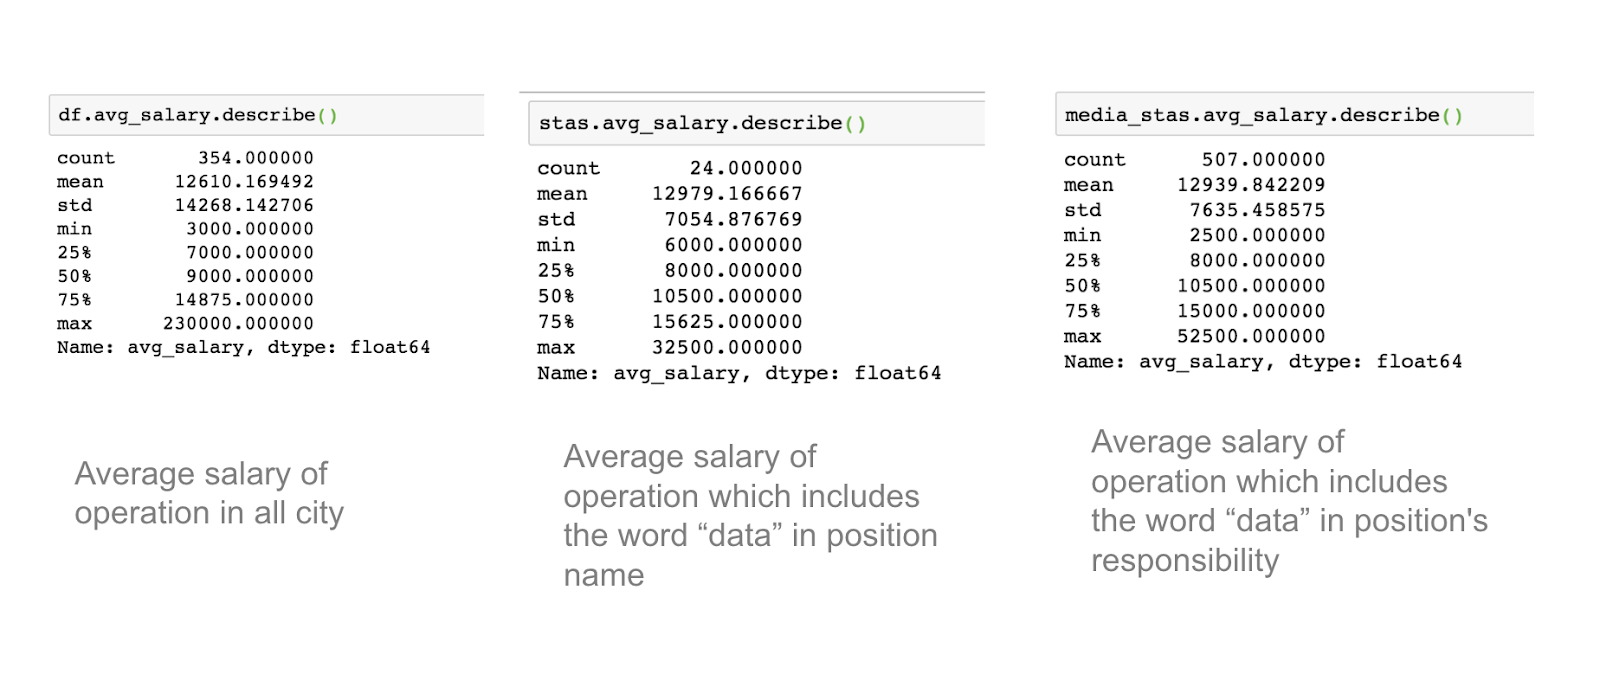

In [13]:
Image(filename='image6.png')

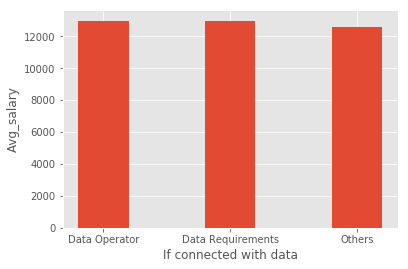

In [14]:
Image(filename='image7.png')

The difference of data operators and operators whose requirements includes data is mainly their responsibilities. The data operators will focus on data processing and analyzing in order to provide support for side of business, most of whom are other operators. The operators whose requirements includes data will emphasis more on their own abilities, for example, user operators will manage the user policy and increase user viscosity. At the same time, they are required to have basic data analysis skill, such as excel and mysql.

#### Q8. Which factors will affect the average salary most significantly?

We define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the variable in explaining the salary.

From the graph, we can see that position turned out to be the most important factor followed by working experience, education level, responsibility and working city. 


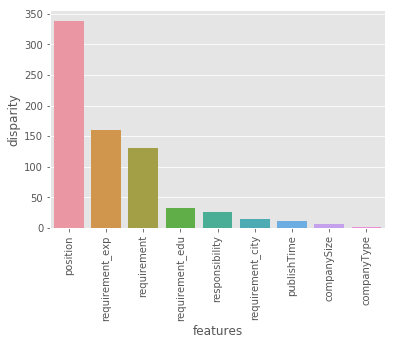

In [15]:
Image(filename='image8.png')

### Conclusion

Viewing the result above, we can find some interesting relation between Internet and operators. For the name of the positions, there are product operator, user operator and community operator, which are closely related with Internet. Also, there are Tianmao operator, Amazon operator and e-business operator, which are totally relied on the Internet. In turns of the industry, apart from the Internet industry, which rank first in the amount of position, there are many other industries related with Internet such as E-business, Internet finance, online education, social network, and so on.

As a position to maintain the daily content, activities and so on, it is actually grow as the Internet industry grow. In traditional industry, like manufacturing and commerce, content and activity are not the core value of the industry. However, the information technology brought new chances and needs, leading to the development of operator position. 


From the data we collected, we find some similarity of the position and the Internet industry. For instance, the Internet industry is comparatively young, and working experience requirement of operator is quite short as the largest part is 1-3 year experience. Operator is a position requires comprehensive ability and especially the ability to absorb new knowledge and acquire new skills for it need the continuous catching up with their product, users and social environment. 

The ability of learning and adoption is more important than long experience and high education degree. Similar to other job, the salary of operator is positively correlated with education degree and working experience, while there are not large amount of position requiring high education level(master or higher) and long-time working experience(more than 5 years). 

What’s more, as the usage of big data come to the stage, it goes further with the help of data analysis. The operator positions requires the ability of data analysis and even some of their name is data operators.

Since big data is increasingly important in this age, the ability to use it in operators is very useful. Among the positions, the more closely related with data analysis, the higher the salary is.


For people who head to this job. We have some suggestions. Firstly, to be a good operator, one have better to master the skills of data analysis and data management. As many of the company do not clearly understand the value and application of big data, usually there is not clear Instruction for operator to manage the data. With the skill, operator can make better use of the data and accumulate this resource. Besides, for undergraduate student, to get a operator job, working experience is more important than higher education degree. 

As most of the companies require at least one year working experience, applicants with relative internship are more competitive. Last but not least, to be an operator, applicant have better to plan the working career earlier and be ready for transformation. As this position usually require less specific skill and experience while repeat the same contents, operator might apply their accumulation in some more challenging job such as product manager.  


### Implication

For the further study on some related topics, it  can provoke to explore more about the challenge and opportunity in an era of big data. We can crawl more data to show the whole marketing situations not only from one position. And also we can compare different responsibilities of different positions to clarify what kind of talent will be more competitive and popular in today’s world.

For the job seeker who wants to engage in the position of operators and obtain high salary, this report would be a reference for him/her to select related jobs and prepare the required skills and other factor needed in advanced. For example, they would better equip themselves with data processing knowledge and skills since they are faced with the challenge of big data. 

For our future study, the process of finishing this report will play a role of enlightenment. It improve our capability of coding, the skills of searching, and most importantly, change our way of thinking. Besides, although we spend a lot of time and make enormous efforts in python crawler, there are something imperfect when presenting the result. We should have connected each separated result together. So this would be a point to carefully think about when we or other data learners want to do some similar scraping —— to consider how to tell a story before data acquisition. In this way, data can serve the theme better. 


## Finally Xiao Zhang and Xiao He made up their mind to study data acquisition and analyzing HARDLY and try to seek a job as data operator after graduation.